<a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/DVwPY_S2/2-DVwPy_S2_Matplotlib_Pandas.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a><br/>
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/DVwPY_S2/2-DVwPy_S2_Matplotlib_Pandas.ipynb)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

![image.png](https://i.ibb.co/4gc0nbk/matplotlib.png)

Matplotlib is a two-dimensional (2D) plotting library for Python. It was created by John D. Hunter, an American neurobiologist, and was first released in 2002. With Matplotlib, you can generate lines, scatter graphs, bar charts, histograms, error bars, etc, and even do simple 3D plots using the mplot3d toolkit. Matplotlib has a module called Pyplot, which provides an interface similar to MatLab.

[MATPLOTLIB Source](https://medium.com/@developit19/matplotlib-python-651fd07e9234)

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CONTENT</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [REVIEW](#1)
    * [Subplot](#1.1)
    * [Optional](#1.2)
* [SPECIAL PLOT TYPES](#2)
* [SCATTER PLOT](#3)
* [BAR PLOT](#4)
    * [Optional](#4.1)
* [HISTOGRAM](#5) 
* [BOX PLOT](#6)
* [PIE CHART](#7)
* [PANDAS SCATTER](#8) 
* [PANDAS BAR PLOT](#9)
* [PANDAS HISTOGRAM](#10)
* [PANDAS BOX PLOT](#11) 
* [PANDAS PIE CHART](#12)
* [KERNEL DENSITY ESTIMATION (KDE)](#13)
* [3-DIMENSIONAL PLOTTING IN MATPLOTLIB](#14)
* [THE END OF THE MATPLOTLIB SESSION 02](#15)    

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

In [2]:
age = [25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45]

salary = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

salary_2 = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">REVIEW</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

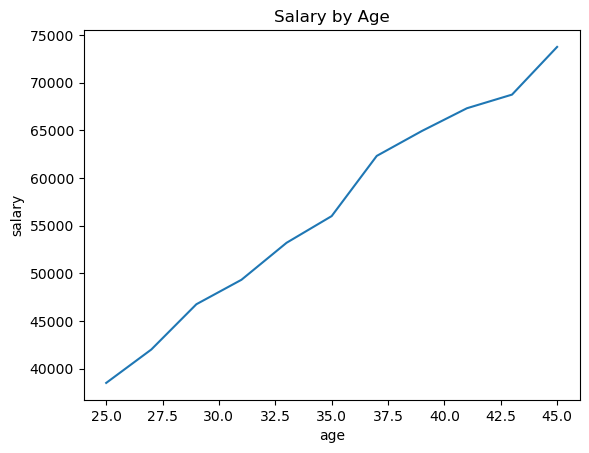

In [3]:
# Functional 

plt.plot(age, salary)
plt.xlabel("age")
plt.ylabel("salary")
plt.title("Salary by Age");
plt.show()

In [5]:
default_fig_size = plt.rcParams.get('figure.figsize')
default_fig_size

[6.4, 4.8]

In [6]:
plt.rcParams['figure.figsize'] = [3, 2]

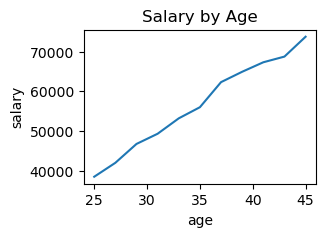

In [7]:
plt.plot(age, salary)
plt.xlabel("age")
plt.ylabel("salary")
plt.title("Salary by Age");
plt.show()

In [8]:
plt.rcParams['figure.figsize'] = default_fig_size

In [8]:
plt.rcParams['figure.figsize'] = default_fig_size

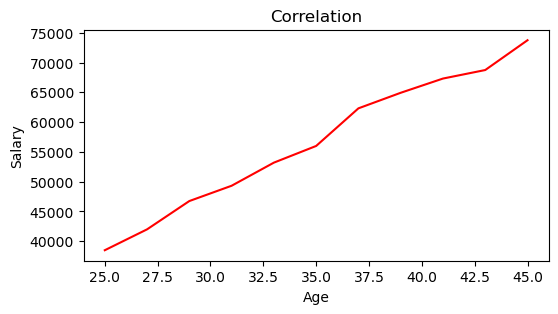

In [9]:
# Object Oriented

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(age, salary, 'r')
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_title('Correlation');

# plt.show()

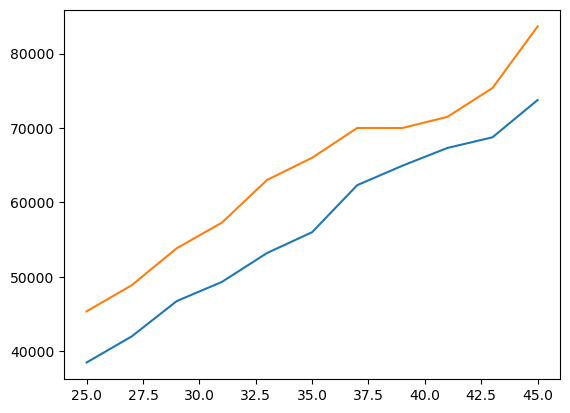

In [10]:
plt.plot(age, salary, age,salary_2);

# plt.show()

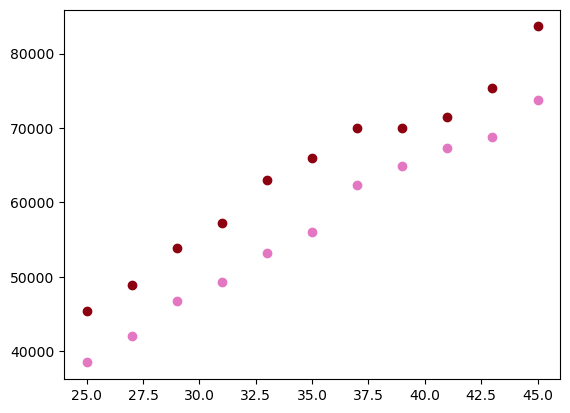

In [11]:
plt.scatter(age, salary, color="tab:pink")
plt.scatter(age, salary_2, color="xkcd:crimson");

In these next few cells, we amalgamate the two salary data sets into one, by concatenation, and by extending age with a duplicate of itself, as both salary sets are paired with the same ages.

The way sklearn models want their input is as X, a two-dimensional array or DataFrame, and as y, a one-dimensional list or Series, the value X is trying to predict.

Our X is just one column, age, but could be more, in which case the Linear Regression model would give us more coefficients, or weights.  One for each column.

In [12]:
all_salary = np.array(salary + salary_2)
all_salary.shape

(22,)

In [13]:
all_age = np.array(age + age).reshape(-1,1)
all_age.shape

(22, 1)

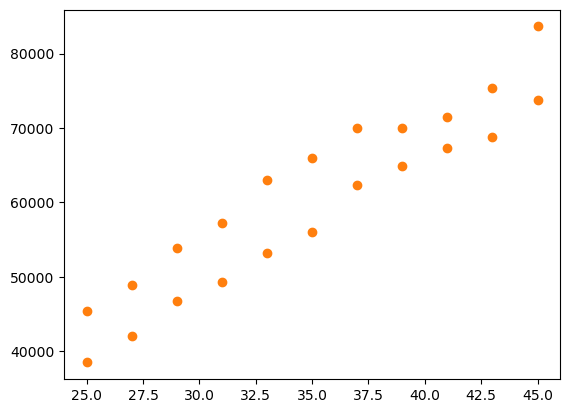

In [14]:
plt.scatter(all_age, all_salary, color="tab:orange");

Lets start with a scatter plot of all our (age, salary) pairs, then use Linear Regression to best fit a straight line through all the points.

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X=all_age, y=all_salary)  #  X is 2D, y is 1D

LinearRegression()

Do you remember $y = mx + b$ from earlier schooling?  That's the equation for a line, where `m` is slope and `b` is the y-intercept, i.e. where our line crosses the y-axis.

In [16]:
m = reg.coef_  # only one column in X
m

array([1745.37727273])

In [17]:
b = reg.intercept_  # the y intercept
b

-736.5227272727279

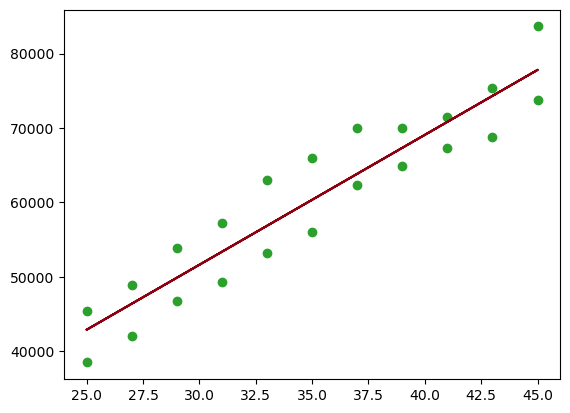

In [18]:
plt.scatter(all_age, all_salary, color="tab:green");
plt.plot(all_age, 
         list(map(lambda x: m * x + b, all_age)),  # linear equation 
         color="xkcd:crimson");

The `sklearn.linear_model.LinearRegression` machine learns from the data we give it.  Here we've given it all the data we have, and are now seeing what salaries it would predict given new ages.  By "predict", we mean "what would the model say?".  Not surprisingly, all the predictions are along our best fit line.

In [19]:
new_data = np.array([20, 25, 35, 50]).reshape(-1, 1)
predicted = reg.predict(new_data)
predicted

array([34171.02272727, 42897.90909091, 60351.68181818, 86532.34090909])

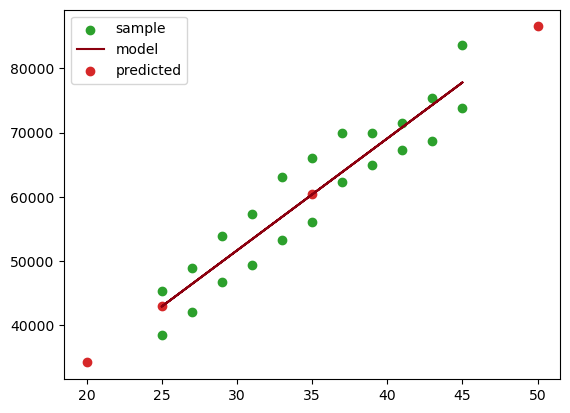

In [20]:
plt.scatter(all_age, all_salary, color="tab:green", label="sample")
plt.plot(all_age, 
         list(map(lambda x: m * x + b, all_age)), 
         color="xkcd:crimson", label="model")
plt.scatter(new_data, predicted, color="tab:red", label="predicted")
plt.legend();

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Subplot</p>

<a id="1.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

![image.png](https://i.ibb.co/mHHtNBx/eggs.jpg) Photo by Tengyart on Unsplash

Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts.

Matplotlib provides a convenient method called subplots to do this. Subplots define an array of axes (each one defining a plot) that can co-exist within a single figure.

[SOURCE 01](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html), [SOURCE 02](https://www.machinelearningplus.com/plots/subplots-python-matplotlib/), [SOURCE 03](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html), [SOURCE 04](https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php), [SOURCE 05](https://www.tutorialspoint.com/matplotlib/matplotlib_subplots_function.htm), [SOURCE 06](https://towardsdatascience.com/take-full-control-over-the-subplots-in-matplotlib-71b3bc11ff0b) & [SOURCE 07](https://www.youtube.com/watch?v=j4eGsLdh9ws)

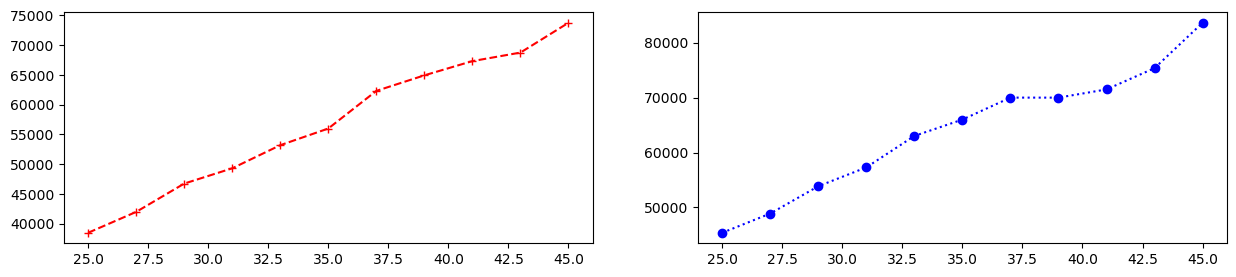

In [21]:
# Functional 

plt.figure(figsize=(15, 3))  # wide and not tall

plt.subplot(1, 2, 1)
plt.plot(age, salary, "r+", ls="--")  # color and marker style combined


plt.subplot(1, 2, 2)
plt.plot(age, salary_2, "bo", ls=":") # linestyle separate

plt.show()

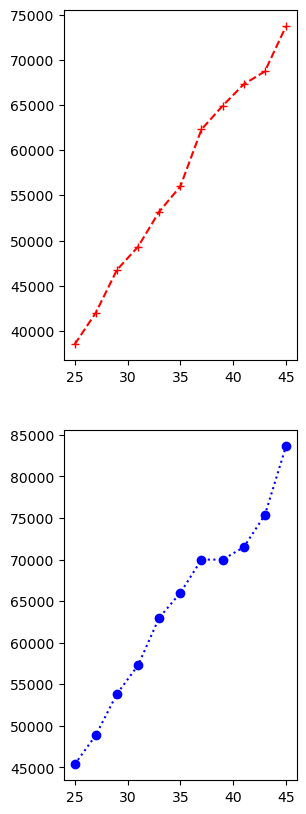

In [22]:
plt.figure(figsize=(3, 10))  #  narrow and tall

ax1 = plt.subplot(2, 1, 1)
plt.plot(age, salary, "r+", ls="--")  # color and marker style combined

ax2 = plt.subplot(2, 1, 2)
plt.plot(age, salary_2, "bo", ls=":") # linestyle separate

plt.show()

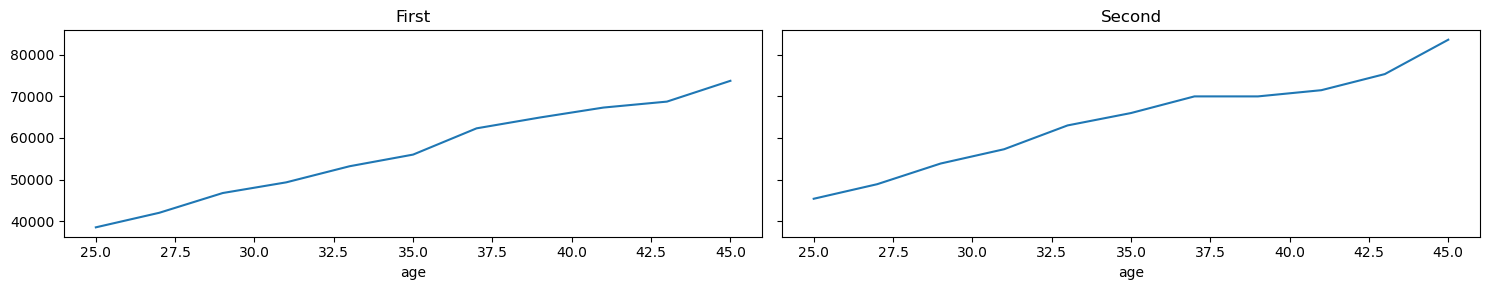

In [25]:
# Object Oriented

fig, axs = plt.subplots(nrows=1, ncols=2, 
                       sharey = True, 
                       figsize=(15, 3))

axs[0].plot(age, salary)
axs[0].set_xlabel('age')
axs[0].set_title('First')

axs[1].plot(age, salary_2)
axs[1].set_title('Second')
axs[1].set_xlabel('age')

plt.tight_layout()

plt.show()

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optional</p>

<a id="1.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

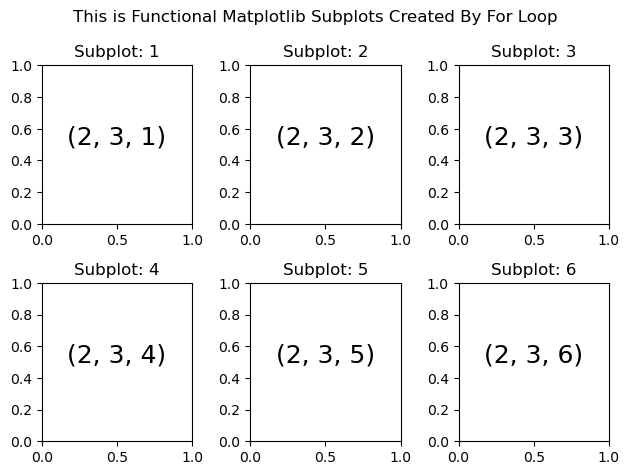

In [26]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')
    plt.title(f"Subplot: {i}")

plt.suptitle("This is Functional Matplotlib Subplots Created By For Loop")
plt.tight_layout() 

plt.show()

**Adding Text Inside the Plot in Matplotlib**

The matplotlib.pyplot.text() function is used to add text inside the plot. The syntax adds text at an arbitrary location of the axes. It also supports mathematical expressions.

**Syntax:** matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)

Parameters:

- where x, y – coordinates
- s – text to be added inside the plot(string)
- fontdict – optional parameter. It overrides the default text properties
- **kwargs – text properties

[SOURCE 01](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) & [SOURCE 02](https://www.geeksforgeeks.org/add-text-inside-the-plot-in-matplotlib/)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SPECIAL PLOT TYPES</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

![matplotlib1.png](https://i.ibb.co/jTZFN49/matplotlib1.png)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SCATTER PLOT</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

![Capture7.PNG](https://i.ibb.co/8bXD2Bj/Capture7.png)

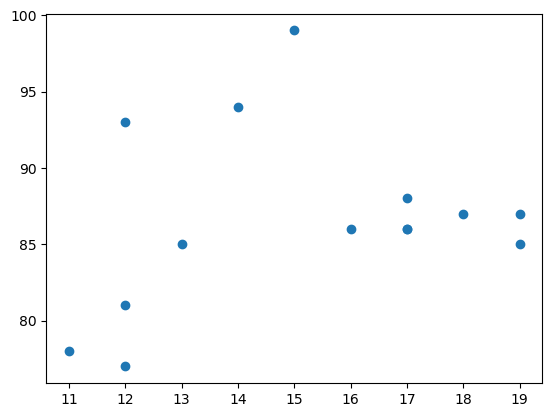

In [29]:
x = np.array([15, 17, 18, 17, 12, 17, 12, 19, 14, 11, 12, 19, 16, 13])
y = np.array([99, 86, 87, 88, 81, 86, 93, 87, 94, 78, 77, 85, 86, 85])

plt.scatter(x, y)
plt.show()

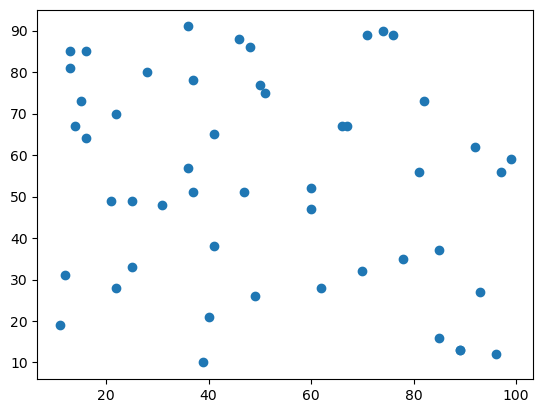

In [37]:
y = np.random.randint(10, 100, 50)
x = np.random.randint(10, 100, 50)

plt.scatter(x, y)
plt.show()

In [38]:
x

array([71, 41, 36, 21, 22, 41, 14, 36, 62, 81, 78, 31, 89, 28, 97, 85, 25,
       85, 89, 70, 37, 96, 74, 16, 46, 47, 22, 11, 49, 92, 67, 13, 51, 40,
       12, 60, 82, 60, 48, 37, 15, 76, 13, 93, 25, 16, 39, 99, 66, 50])

In [39]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [40]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


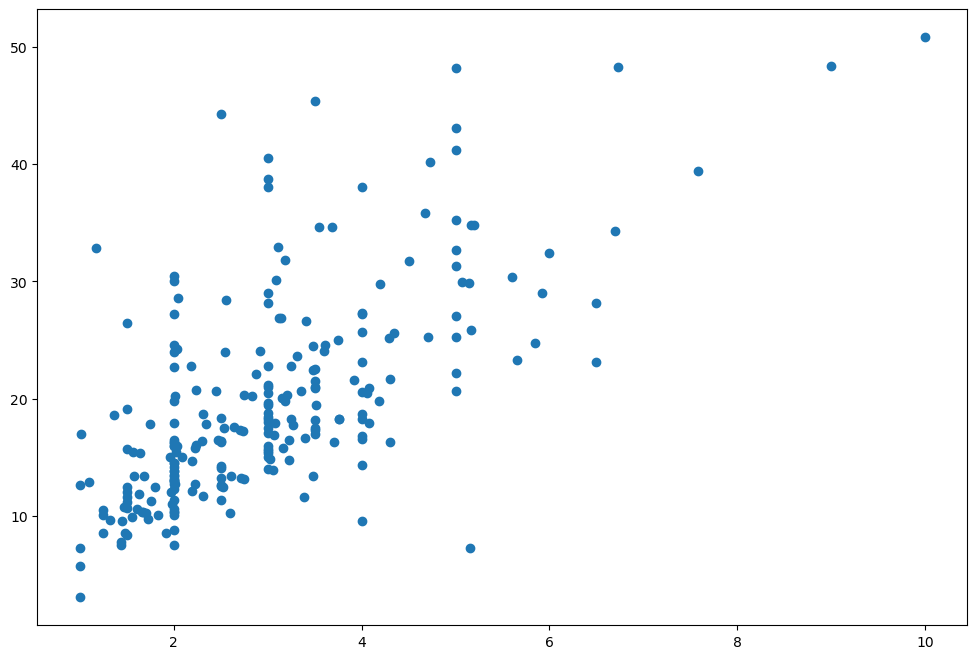

In [42]:
plt.figure(figsize=(12, 8))

plt.scatter(tips['tip'], tips['total_bill']);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BAR PLOT</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

![Capture8.PNG](https://i.ibb.co/hK72Tnf/Capture8.png)

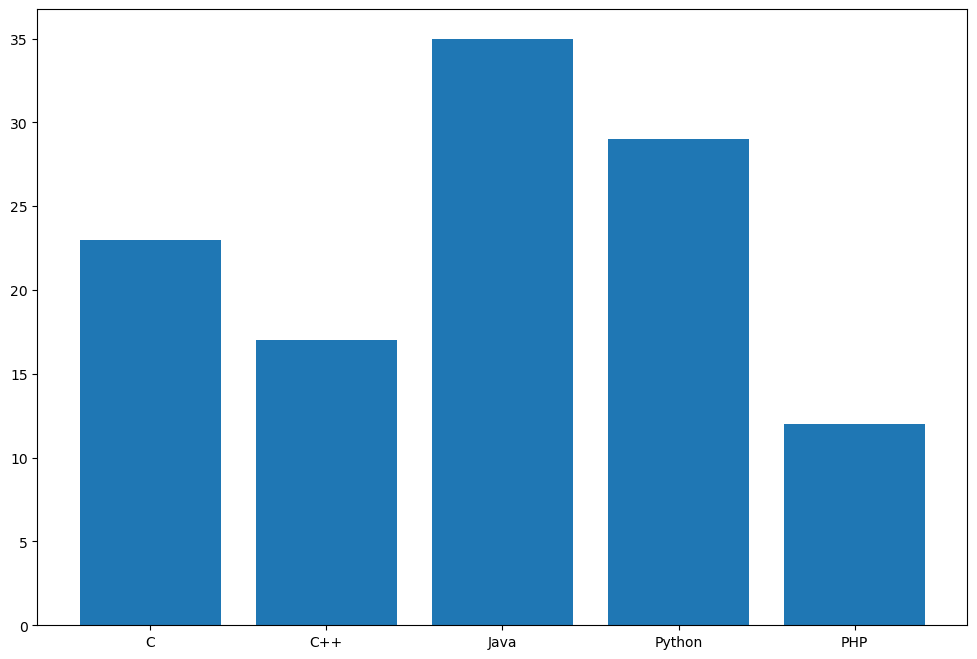

In [43]:
# Object Oriented

langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23, 17, 35, 29, 12]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(langs, students);
# plt.show()

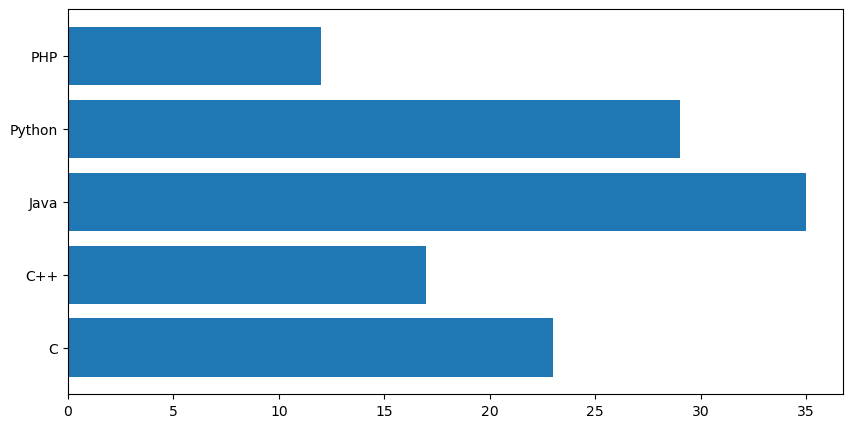

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23, 17, 35, 29, 12]

ax.barh(langs, students)
plt.show()

In [46]:
# tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
tips.groupby(tips["day"]).sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [48]:
day = tips.groupby("day").sum().index   # tips.day.unique()
day

CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category', name='day')

In [49]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [53]:
day_of_total_bill_list= list(tips.groupby("day")["total_bill"].sum())
day_of_total_bill_list

[1096.33, 325.88, 1778.4, 1627.16]

In [54]:
day_of_total_bill= tips.groupby("day")[["total_bill"]].sum()
day_of_total_bill
# pd.DataFrame(day_of_total_bill)

,total_bill
day,
Thur,1096.33
Fri,325.88
Sat,1778.40
Sun,1627.16


In [55]:
day_of_total_bill= tips.groupby("day")["total_bill"].sum()
pd.DataFrame(day_of_total_bill)

,total_bill
day,
Thur,1096.33
Fri,325.88
Sat,1778.40
Sun,1627.16


In [56]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


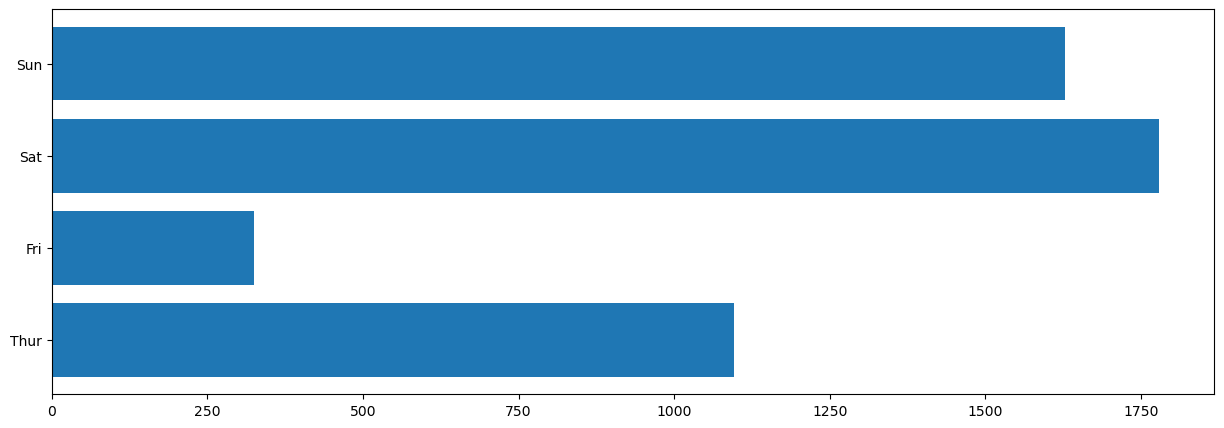

In [59]:
# Object Oriented

fig, ax = plt.subplots(figsize=(15, 5))

# ax.barh(tips.day.unique(), day_of_total_bill) # <-- oops, decouples day from data
ax.barh(day_of_total_bill.index, day_of_total_bill)
plt.show()

In [60]:
day_tip = np.array(tips.groupby("day")["tip"].sum())
day_tip

array([171.83,  51.96, 260.4 , 247.39])

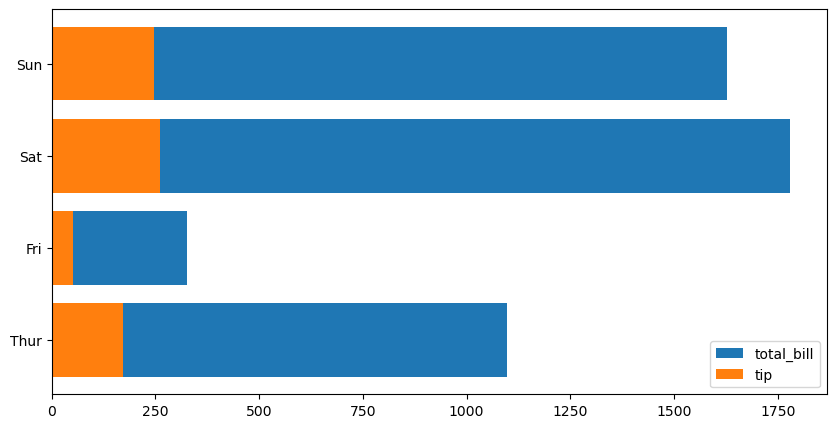

In [61]:
# Object Oriented

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(day, day_of_total_bill,  label="total_bill")
ax.barh(day, day_tip,            label="tip")

plt.legend();

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optional</p>

<a id="4.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [63]:
type(day)

pandas.core.indexes.category.CategoricalIndex

In [64]:
len(day)

4

In [65]:
type(day_of_total_bill)

pandas.core.series.Series

In [66]:
day_of_total_bill.index

CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category', name='day')

In [67]:
day_of_total_bill.values

array([1096.33,  325.88, 1778.4 , 1627.16])

In [68]:
day_tip

array([171.83,  51.96, 260.4 , 247.39])

[matplotlib.axes.Axes.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)

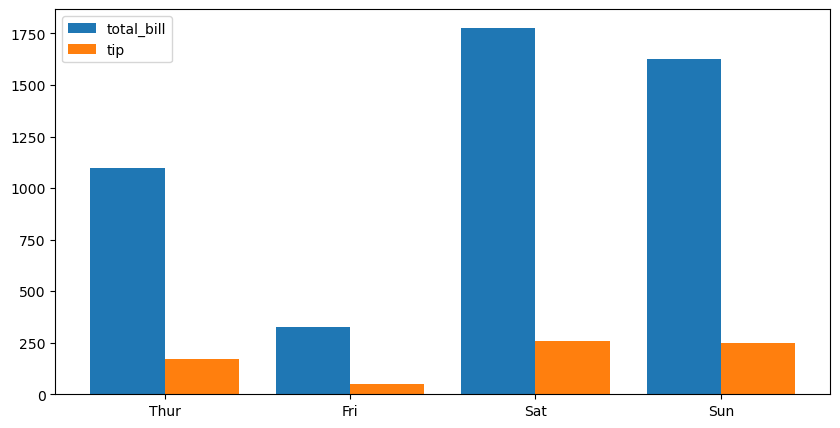

In [71]:
# Taking control of matplotlib features

fig, ax = plt.subplots(figsize=(10, 5))

p = np.arange(len(day))
width = 0.40

# shift left and right of the x-tick
ax.bar(p - width/2, day_of_total_bill, width, label="total_bill")
ax.bar(p + width/2, day_tip,           width, label="tip")

# no shifting, superimpose
# ax.bar(p, day_of_total_bill, width, label="total_bill")
# ax.bar(p, day_tip,           width, label="tip")

ax.set_xticks(p)
ax.set_xticklabels(day)

plt.legend()
plt.show()

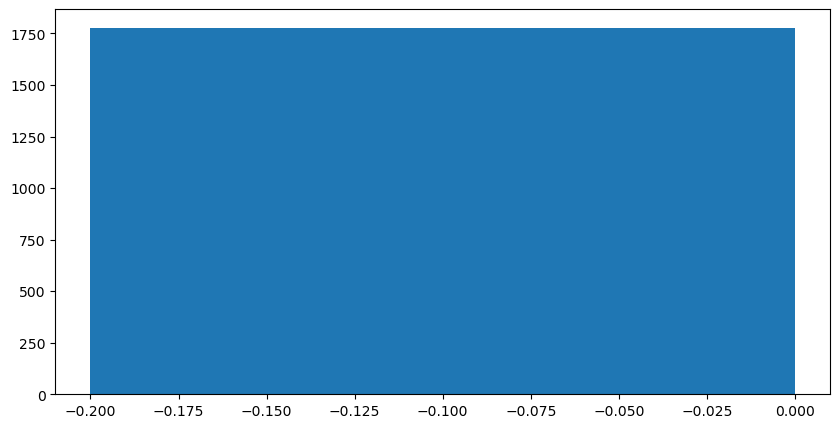

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))

width = 0.20

ax.bar(-0.1, day_of_total_bill, width, label="total_bill");

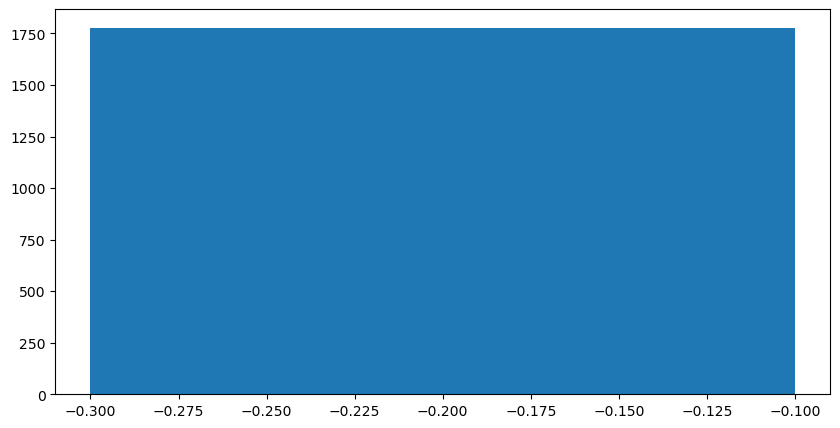

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))

width = 0.20

ax.bar(-0.1 - width/2, day_of_total_bill, width, label="total_bill");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">HISTOGRAM</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

![Capture9.PNG](https://i.ibb.co/pnmw683/Capture9.png)

In [74]:
no = np.random.randn(10)
no

array([-1.38474433, -0.87435843, -0.89438373,  1.54047225,  0.99081777,
        0.74783402,  0.21891571,  0.27028329, -1.23483872,  0.37440231])

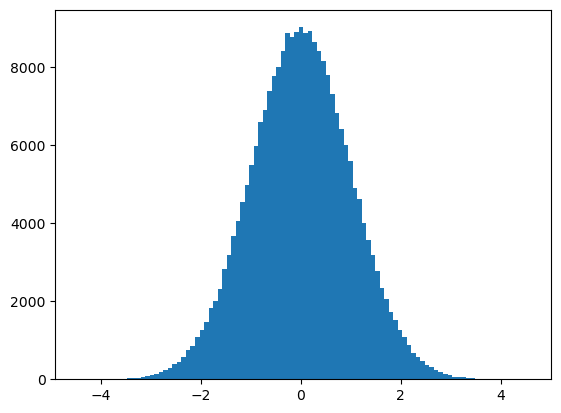

In [88]:
np.random.seed(42)

x = np.random.randn(250000)
plt.hist(x, bins=100)
plt.show()

* [Random Generator in numpy](https://numpy.org/doc/stable/reference/random/generator.html)
* [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
* [Generator.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html)

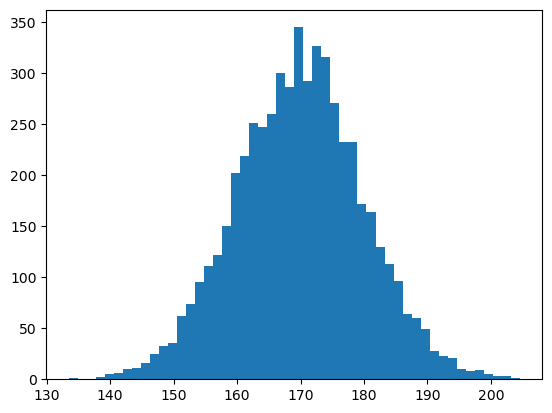

In [90]:
# center =170, sd = 10, n=5500

rng = np.random.default_rng(42) # old way: np.random.seed(42)

x = rng.normal(170, 10 , 5500)  # alpha=0.5
plt.hist(x, bins=50 )
plt.show()

In [108]:
pd.set_option('display.max_rows', None)
tips.head(500)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [92]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


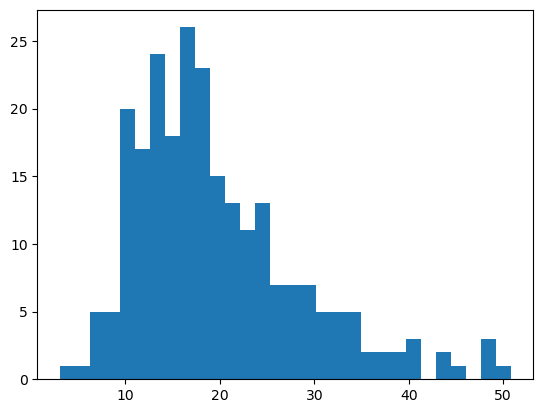

In [97]:
plt.hist(tips['total_bill'], bins=30 )
plt.show()

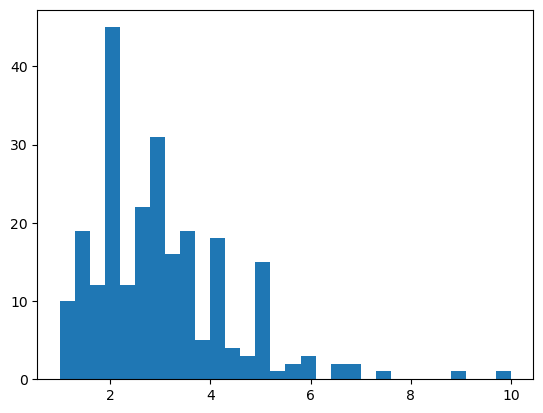

In [98]:
plt.hist(tips['tip'], bins=30 )
plt.show()

In [99]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BOX PLOT</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

[SOURCE 01](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html), [SOURCE 02](https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4), [SOURCE 03](https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/), [SOURCE 04](https://www.tutorialspoint.com/matplotlib/matplotlib_box_plot.htm), [SOURCE 05](https://blog.finxter.com/matplotlib-boxplot/), [SOURCE 06](https://www.youtube.com/watch?v=qb6krT2k3xw) & [SOURCE 07](https://youtu.be/xAoljeRJ3lU)

![Capture10.PNG](https://i.ibb.co/dpg2XkM/Capture10.png)

<img src="https://i.ibb.co/25bZJ9w/boxplot-complete.png" width=440, align="center">

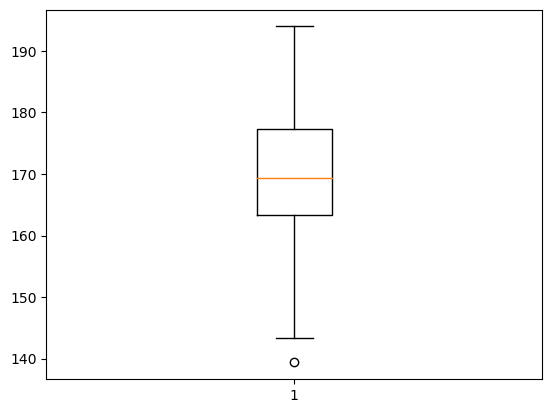

In [105]:
import matplotlib.pyplot as plt
import numpy as np

X = rng.normal(170, 10, 250)

plt.boxplot(X)
plt.show() 

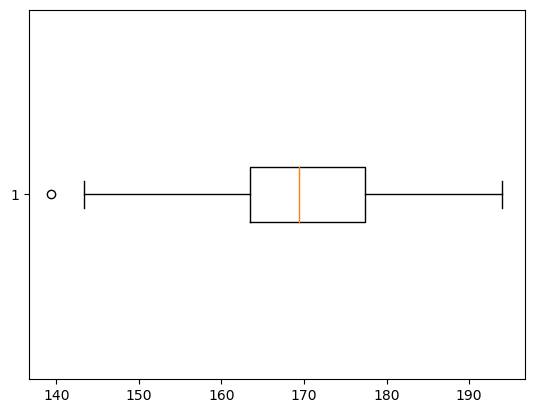

In [106]:
# X = np.random.normal(170, 10, 250)

plt.boxplot(X, vert=False);
# plt.show() 

[numpy.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

In [113]:
box = np.array(np.random.rand(10, 4))  # shape, uniform between [0, 1)
box

array([[0.28398337, 0.41410287, 0.25728226, 0.77086279],
       [0.63317157, 0.52885867, 0.22927854, 0.62619751],
       [0.74425769, 0.23105129, 0.06080517, 0.19688303],
       [0.41072543, 0.01543542, 0.69123431, 0.34477749],
       [0.71072403, 0.07772963, 0.0810196 , 0.03015974],
       [0.23528545, 0.7617252 , 0.57528105, 0.8164165 ],
       [0.28909359, 0.11790717, 0.99646035, 0.08293847],
       [0.6208339 , 0.38963943, 0.38392075, 0.76605201],
       [0.03848798, 0.61491044, 0.22658937, 0.45935297],
       [0.70180505, 0.86020506, 0.9772174 , 0.98040807]])

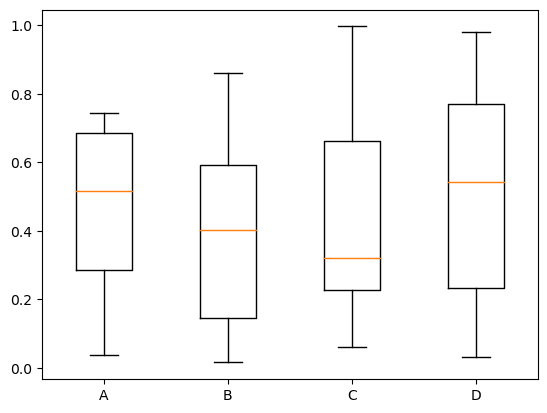

In [114]:
plt.boxplot(box, labels=['A', 'B', 'C', 'D'])
plt.show()

In [ ]:
# ? np.random.rand

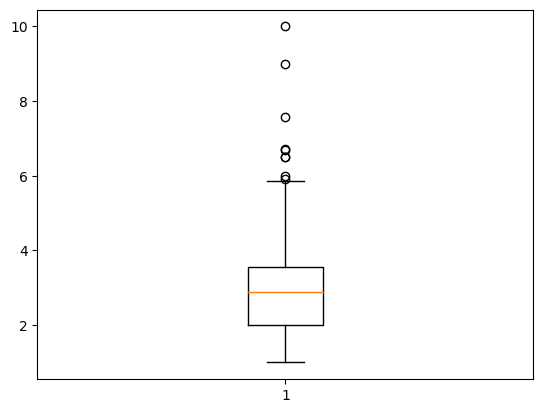

In [115]:
plt.boxplot(tips['tip'])
plt.show(); 

In [116]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


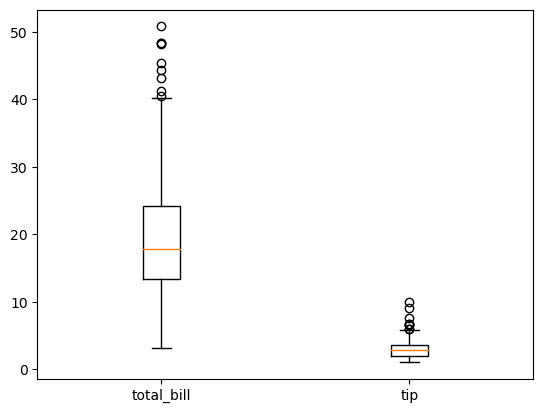

In [117]:
plt.boxplot(tips.iloc[:, 0:2], labels=['total_bill', 'tip'])
plt.show() 

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PIE CHART</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

[SOURCE 01](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html), [SOURCE 02](https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm), [SOURCE 03](https://pythonguides.com/matplotlib-pie-chart/), [SOURCE 04](https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples/), [SOURCE 05](https://www.youtube.com/watch?v=MPiz50TsyF0) & [SOURCE 06](https://www.youtube.com/watch?v=oUe2Q2yz5tM)

![Capture11.PNG](https://i.ibb.co/stSwj18/Capture11.png)

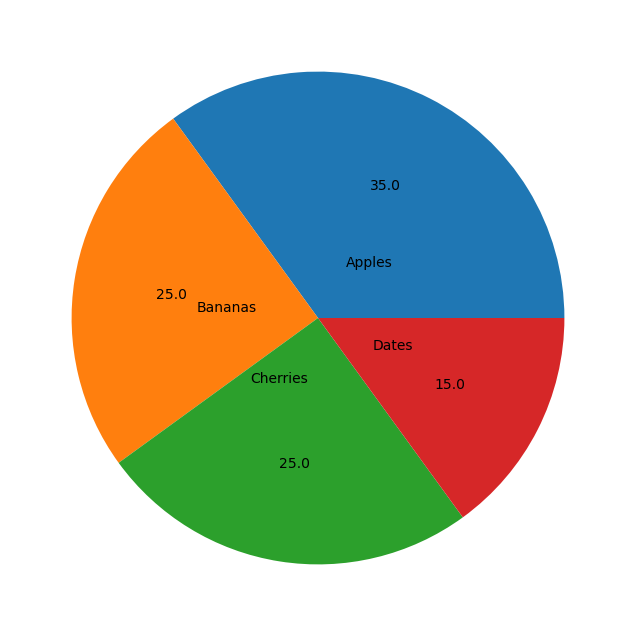

In [118]:
plt.figure(figsize=(10, 8))

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels=mylabels, labeldistance=0.25, autopct="%.1f")
plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Bananas, Dates and Cherries) by passing in `explode` parameter.

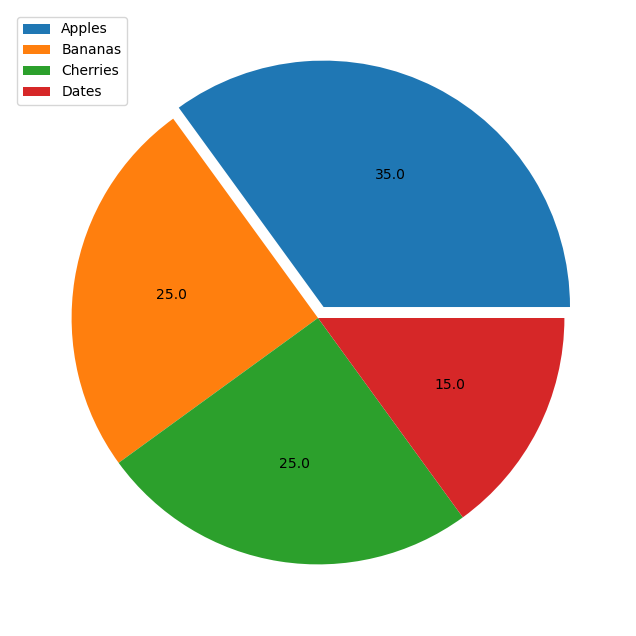

In [131]:
plt.figure(figsize=(10, 8))

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
myexplode = [0.05, 0, 0, 0]

plt.pie(y, labels = mylabels, explode=myexplode, labeldistance=None, autopct="%.1f")
plt.legend()
plt.show()

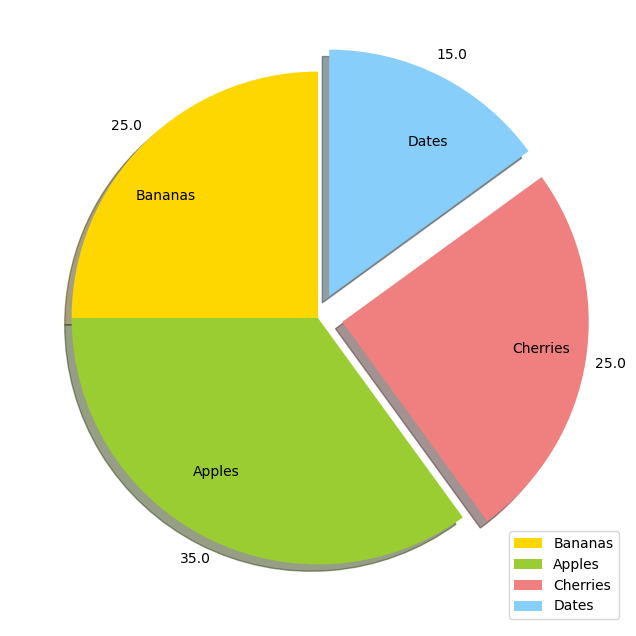

In [133]:
plt.figure(figsize=(10, 8))

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.


y = np.array([25, 35, 25, 15])
mylabels = ["Bananas", "Apples", "Cherries", "Dates"]
# myexplode = [0.1, 0, 0, 0]

plt.pie(y, 
        labels = mylabels,
        labeldistance=0.7, 
        autopct="%.1f", 
        startangle=90, 
        shadow=True, 
        pctdistance=1.1, 
        colors=colors_list, 
        explode=explode_list)

plt.legend()
plt.show()

![image.png](https://i.ibb.co/qk9y7sC/datavisualizatinwithpython.jpg)

In [134]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


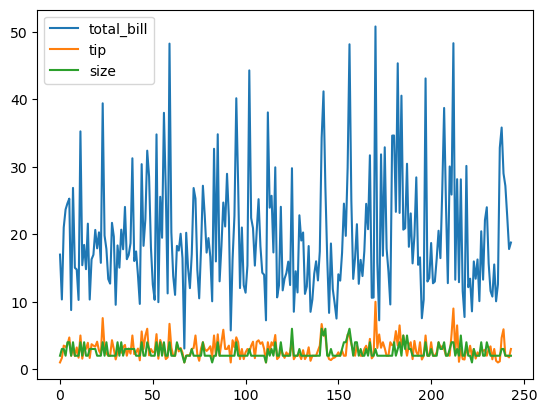

In [135]:
tips.plot();

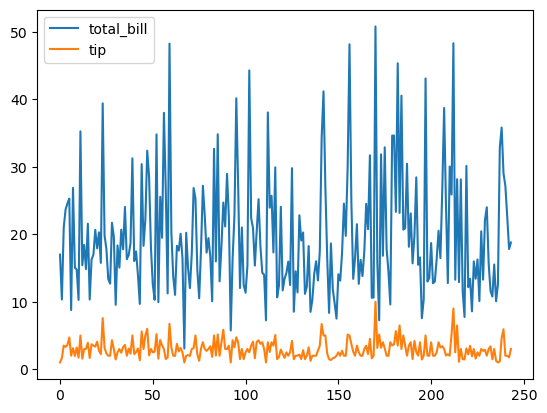

In [136]:
tips.iloc[:, 0:2].plot();

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PANDAS SCATTER</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE 01](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html), [SOURCE 02](https://www.geeksforgeeks.org/pandas-scatter-plot-dataframe-plot-scatter/#:~:text=A%20Scatter%20plot%20is%20a,relationship%20between%20two%20numerical%20variables.&text=Calling%20the%20scatter()%20method,two%20columns%20of%20pandas%20DataFrame.), [SOURCE 03](https://data36.com/scatter-plot-pandas-matplotlib/), [SOURCE 04](https://pythontic.com/pandas/dataframe-plotting/scatter%20plot), [SOURCE 05](https://saralgyaan.com/posts/matplotlib-tutorial-in-python-chapter-6-scatter-plotting/), [SOURCE 06](https://www.youtube.com/watch?v=0IKz-KxDCuM), [SOURCE 07](https://www.youtube.com/watch?v=DWhwQ1_oXnw), [SOURCE 08](https://www.youtube.com/watch?v=i_H5fjqRUDE) & [SOURCE 09](https://www.youtube.com/watch?v=9q-d7TzRjG0&t=28s)

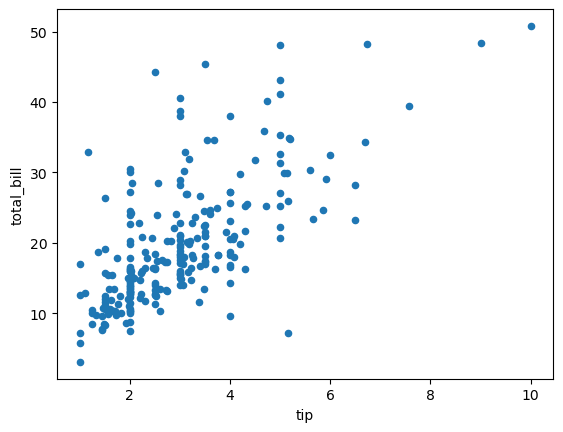

In [137]:
tips.plot.scatter(x='tip', y='total_bill');

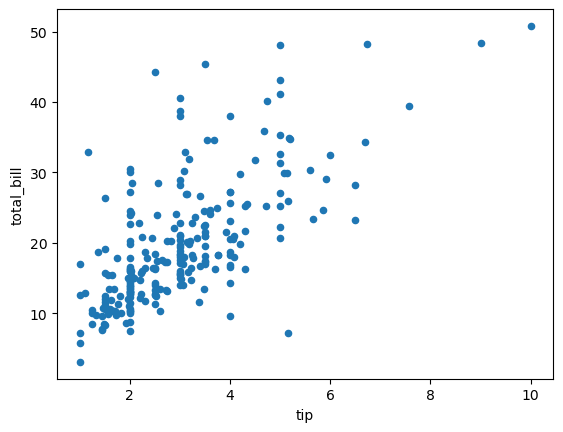

In [138]:
tips.plot(kind="scatter", x='tip', y='total_bill');

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PANDAS BAR PLOT</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html), [SOURCE 02](https://pythontic.com/pandas/dataframe-plotting/bar%20chart), [SOURCE 03](https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe), [SOURCE 04](https://www.youtube.com/watch?v=lRPisI6kzLg), [SOURCE 05](https://www.youtube.com/watch?v=lRPisI6kzLg) & [SOURCE 06](https://youtu.be/lomuFOEGLSM)

          a         b         c         d
0  0.997542  0.619688  0.281716  0.587740
1  0.892066  0.837131  0.073861  0.412292
2  0.348224  0.830689  0.913201  0.921440
3  0.791821  0.688109  0.589766  0.096472
4  0.616203  0.522017  0.206709  0.765047


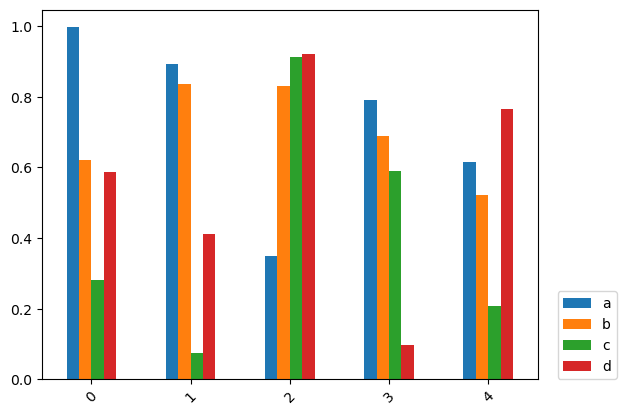

In [142]:
df = pd.DataFrame(np.random.rand(5, 4), columns=['a', 'b', 'c', 'd'])
print(df)
# df.plot.bar()
df.plot.bar(rot=45)
plt.legend(loc=(1.04, 0));

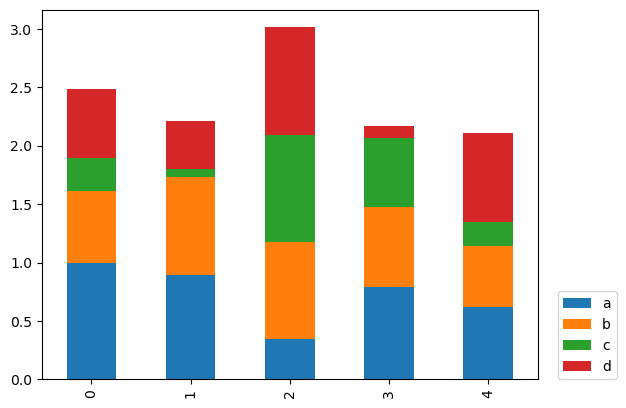

In [143]:
# df = pd.DataFrame(np.random.rand(5, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar(stacked=True)
plt.legend(loc=(1.04, 0));

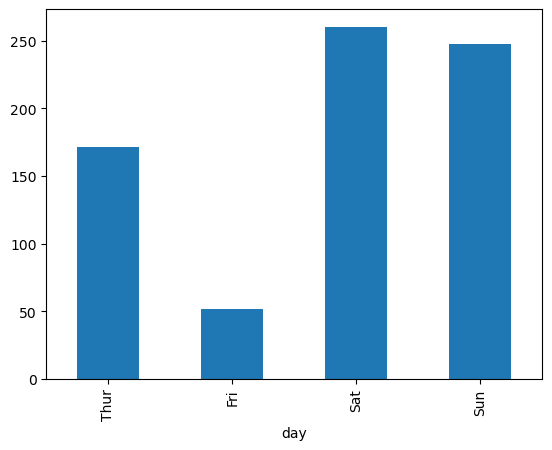

In [144]:
tips.groupby("day")["tip"].sum().plot.bar(x="day", y="tip");

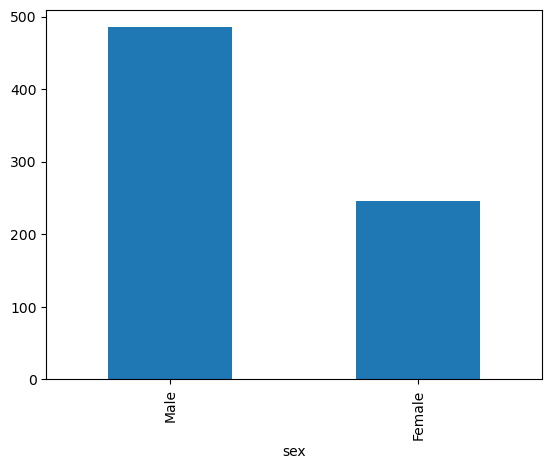

In [147]:
tips.groupby("sex")["tip"].sum().plot.bar(x="sex", y="tip");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PANDAS HISTOGRAM</p>

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html), [SOURCE 02](https://www.machinelearningplus.com/pandas/pandas-histogram/), [SOURCE 03](https://www.dataindependent.com/pandas/pandas-histogram/), [SOURCE 04](https://www.tutorialspoint.com/python-plot-a-histogram-for-pandas-dataframe-with-matplotlib), [SOURCE 05](https://www.youtube.com/watch?v=zNvxJNQhmRs) & [SOURCE 06](https://youtu.be/zNvxJNQhmRs)

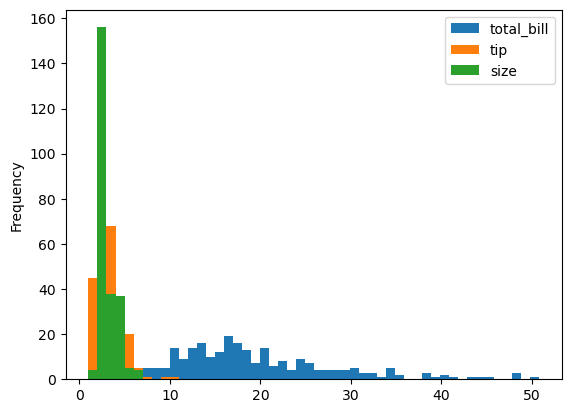

In [148]:
tips.plot.hist(bins=50);

[DataFrame.diff](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)

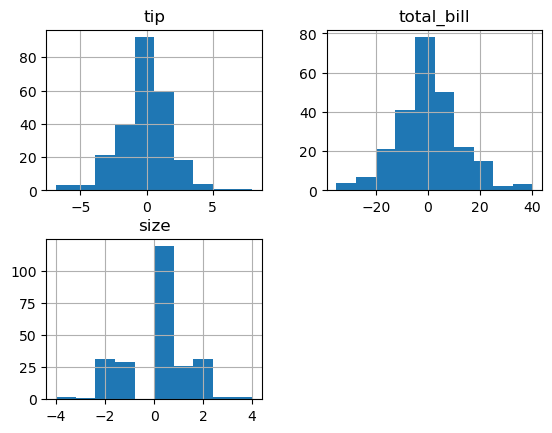

In [149]:
tips[["tip", "total_bill", "size"]].diff().hist(bins=10)
plt.show()

In [ ]:
# ? pd.DataFrame.diff

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PANDAS BOX PLOT</p>

<a id="11"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

a box plot is a method for graphically depicting groups of numerical data through their quartiles.

a box plot generally shows median, 25th and 75th percentiles, and outliers.

[SOURCE 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html), [SOURCE 02](https://www.educative.io/edpresso/how-to-make-a-boxplot-in-pandas), [SOURCE 03](https://stackoverflow.com/questions/38120688/how-do-i-create-a-box-plot-for-each-column-in-a-pandas-dataframe) & [SOURCE 04](https://www.youtube.com/watch?v=TJDYXmE1swY)

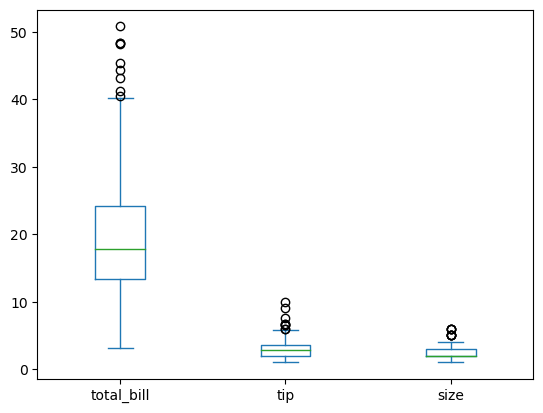

In [150]:
tips.plot.box();

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PANDAS PIE CHART</p>

<a id="12"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html), [SOURCE 02](https://www.plus2net.com/python/pandas-dataframe-plot-pie.php), [SOURCE 03](https://blog.finxter.com/boxplot-the-pandas-plotting-module/), [SOURCE 04](https://youtu.be/yWwlVsiefWQ), [SOURCE 05](https://www.youtube.com/watch?v=kX5oTJoadJ8) & [SOURCE 06](https://www.youtube.com/watch?v=tWEYMIJdxjk)

In [151]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [152]:
tips.groupby("day").sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


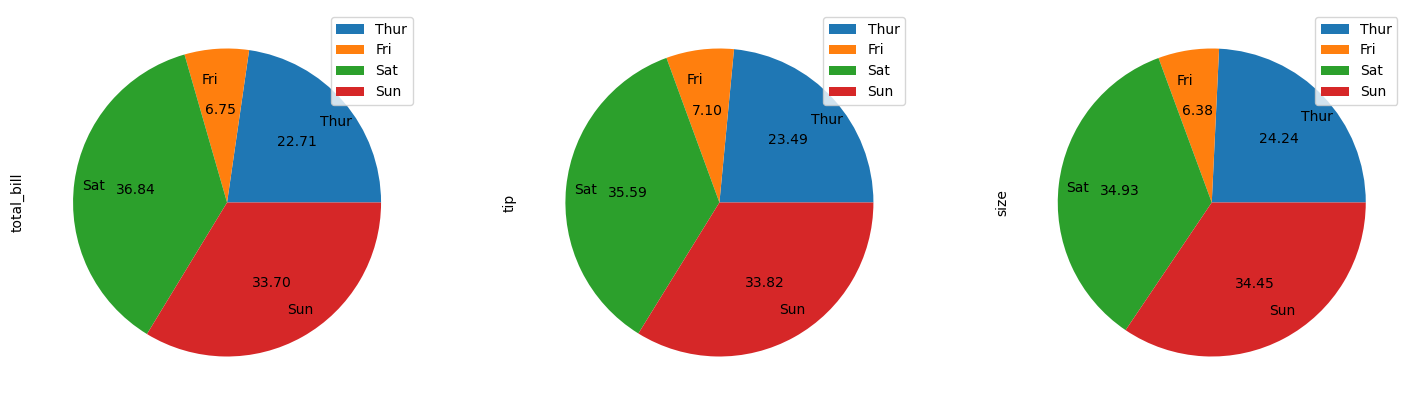

In [153]:
tips.groupby("day").sum().plot.pie(subplots=True, figsize=(18, 5), autopct="%.2f", labeldistance=0.8)
plt.legend()
plt.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">KERNEL DENSITY ESTIMATION (KDE)</p>

<a id="13"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html), [SOURCE 02](https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/) & [SOURCE 03](https://neptune.ai/blog/pandas-plot-deep-dive-into-plotting-directly-with-pandas)

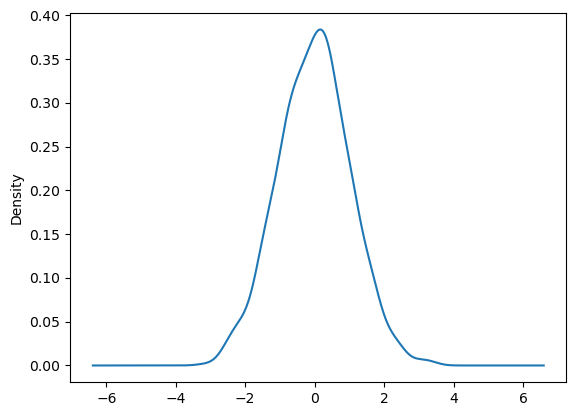

In [154]:
df_kde = pd.Series(np.random.randn(1000))

df_kde.plot.kde();

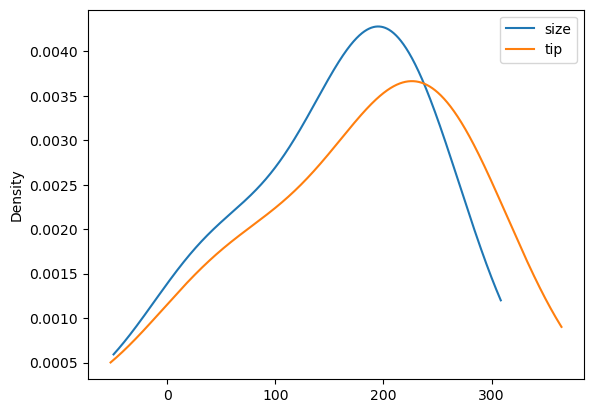

In [155]:
tips.groupby("day")["size", "tip"].sum().plot.kde();

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">3-DIMENSIONAL PLOTTING IN MATPLOTLIB</p>

<a id="14"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

![image.png](https://i.ibb.co/TKhTf2g/3d-plots.png)

Matplotlib was introduced with only two-dimensional plotting in mind. But by the time release 1.0 occurred, the 3d utilities had been and thus, we have 3d plots available today! The 3d plots are enabled by importing the mplot3d toolkit. 

[SOURCE 01](https://www.tutorialspoint.com/matplotlib/matplotlib_three_dimensional_plotting.htm), [SOURCE 02](https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725), [SOURCE 03](https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/), [SOURCE 04](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html), [SOURCE 05](https://www.youtube.com/watch?v=gqoLLGgbeAE) & [SOURCE 06](https://www.youtube.com/watch?v=6ljHxJQ47Uk)

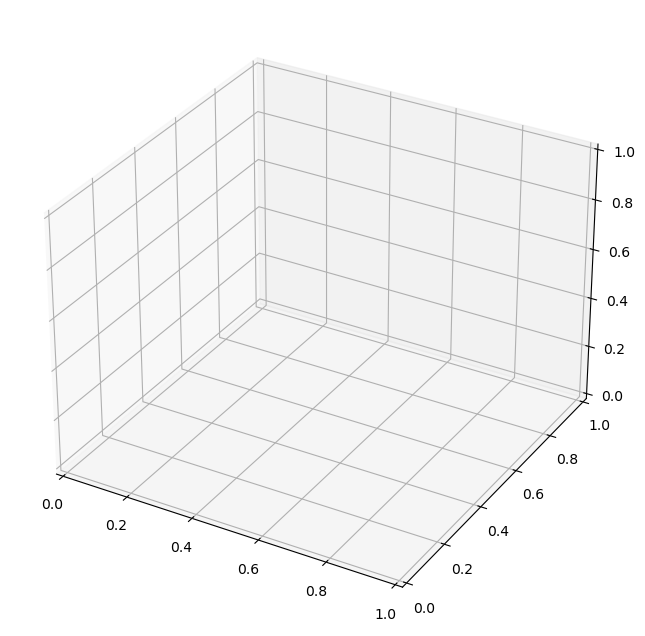

In [156]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

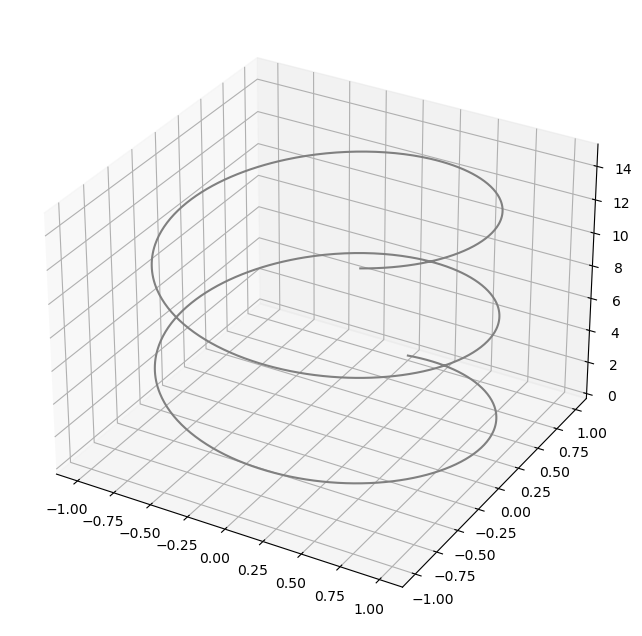

In [157]:
# Data for a three-dimensional line

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

ax.plot3D(xline, yline, zline, 'gray');

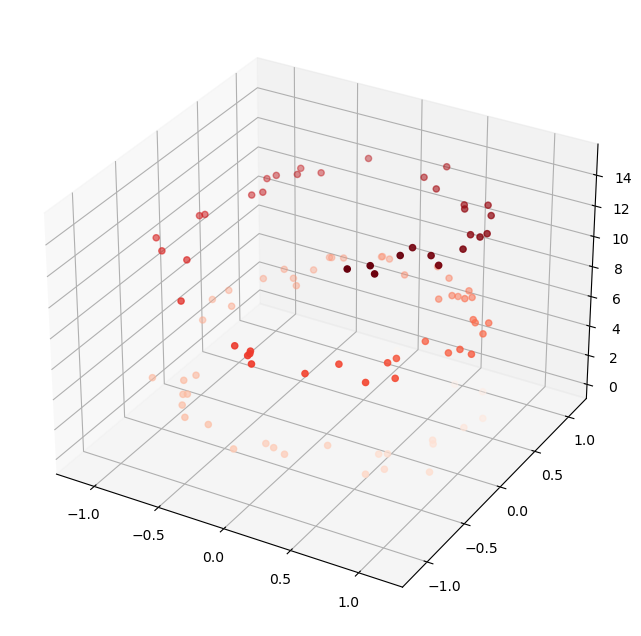

In [158]:
# Data for three-dimensional scattered points

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

In [ ]:
flights = sns.load_dataset("flights")
flights

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE END OF THE MATPLOTLIB SESSION 02</p>

<a id="15"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>
___